## Instagram Performance Analysis - Sephora Portugal 

##### Instagram Data Colection - Using API from rapidapi.com  (https://rapidapi.com/thetechguy32744/api/instagram-scraper-stable-api)

## 1. Introduction & Goal

This project analyzes the Instagram performance of **Sephora Portugal** using public post-level data scraped via RapidAPI. 
The goal is to understand what drives engagement on the account and translate those insights into practical content and posting recommendations.

Because Instagram decisions are often made on intuition, this analysis helps quantify what actually works for this account, based on observed audience behavior during the period analyzed.


## 2. Data Collection 

Data was collected through the RapidAPI *instagram-scraper-stable-api* endpoints. Two calls were used:
1. **Profile lookup** to fetch account metadata (followers, profile info).
2. **User posts endpoint** to retrieve recent posts with likes, comments, captions, media type, and timestamps.

Limitations:
- Only public data is available (no reach, impressions, saves, or shares).
- The dataset represents a snapshot of recent posts and may not reflect long-term patterns.


### 2.1 Setup

Importing the necessary libraries I will use for this project


In [ ]:
import json
import re
import itertools
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import requests


### 2.2 Connect to RapidAPI

In [2]:
# Code from Get User Id endpoint

url = "https://instagram-scraper-stable-api.p.rapidapi.com/ig_get_fb_profile_hover.php"

querystring = {"username_or_url":"sephoraportugal"}

headers = {
	"X-RapidAPI-Key": "c2bb5bfdddmshd1badaa85297b35p1aee2fjsnb0c2abf780c6",
	"X-RapidAPI-Host": "instagram-scraper-stable-api.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"user_data":{"follower_count":344536,"following_count":850,"media_count":9042,"pk":"1444921184","full_name":"Sephora Portugal","username":"sephoraportugal","is_verified":true,"profile_pic_url":"https:\/\/scontent-ams2-1.cdninstagram.com\/v\/t51.2885-19\/344797387_799924641850143_9082411314438259025_n.jpg?stp=dst-jpg_s150x150_tt6&efg=eyJ2ZW5jb2RlX3RhZyI6InByb2ZpbGVfcGljLmRqYW5nby4zMjAuYzIifQ&_nc_ht=scontent-ams2-1.cdninstagram.com&_nc_cat=1&_nc_oc=Q6cZ2QGbVBdJSuC5gs_gYLKkeexHkntjc18KMSaFeZv0Wja1rkvnEVqEaM4PzMGAn27YCBg&_nc_ohc=EkLYNuMLFCQQ7kNvwG13IPy&_nc_gid=X1nYwrdCWCDQBezviUQGEQ&edm=AA5fTDYBAAAA&ccb=7-5&oh=00_Afh8pEQX0DuD0T4z2oMyq9JU9Un7xVFTngRtEmvxjEZSng&oe=6928F7F2&_nc_sid=7edfe2","text_post_app_badge_label":null,"show_text_post_app_badge":null,"live_broadcast_visibility":null,"live_broadcast_id":null,"hd_profile_pic_url_info":{"url":"https:\/\/scontent-ams2-1.cdninstagram.com\/v\/t51.2885-19\/344797387_799924641850143_9082411314438259025_n.jpg?efg=eyJ2ZW5jb2RlX3RhZyI6InByb2ZpbGVfcG

In [3]:
# Parse json from text
resp_user = json.loads(response.text)
resp_user

{'user_data': {'follower_count': 344536,
  'following_count': 850,
  'media_count': 9042,
  'pk': '1444921184',
  'full_name': 'Sephora Portugal',
  'username': 'sephoraportugal',
  'is_verified': True,
  'profile_pic_url': 'https://scontent-ams2-1.cdninstagram.com/v/t51.2885-19/344797387_799924641850143_9082411314438259025_n.jpg?stp=dst-jpg_s150x150_tt6&efg=eyJ2ZW5jb2RlX3RhZyI6InByb2ZpbGVfcGljLmRqYW5nby4zMjAuYzIifQ&_nc_ht=scontent-ams2-1.cdninstagram.com&_nc_cat=1&_nc_oc=Q6cZ2QGbVBdJSuC5gs_gYLKkeexHkntjc18KMSaFeZv0Wja1rkvnEVqEaM4PzMGAn27YCBg&_nc_ohc=EkLYNuMLFCQQ7kNvwG13IPy&_nc_gid=X1nYwrdCWCDQBezviUQGEQ&edm=AA5fTDYBAAAA&ccb=7-5&oh=00_Afh8pEQX0DuD0T4z2oMyq9JU9Un7xVFTngRtEmvxjEZSng&oe=6928F7F2&_nc_sid=7edfe2',
  'text_post_app_badge_label': None,
  'show_text_post_app_badge': None,
  'live_broadcast_visibility': None,
  'live_broadcast_id': None,
  'hd_profile_pic_url_info': {'url': 'https://scontent-ams2-1.cdninstagram.com/v/t51.2885-19/344797387_799924641850143_9082411314438259025_n.j

In [ ]:
# Get account posts
url = "https://instagram-scraper-stable-api.p.rapidapi.com/get_ig_user_posts.php"

body = {
    "username_or_url": "sephoraportugal"
}

headers = {
    "X-RapidAPI-Key": "c2bb5bfdddmshd1badaa85297b35p1aee2fjsnb0c2abf780c6",
    "X-RapidAPI-Host": "instagram-scraper-stable-api.p.rapidapi.com",
    "Content-Type": "application/x-www-form-urlencoded"
}

response = requests.post(url, headers=headers, data=body)
resp_posts_detailed = json.loads(response.text)

print(response.text)


In [73]:
print("Posts pulled from API:", len(resp_posts_detailed["posts"]))
print("Posts reported by profile:", resp_user["user_data"].get("media_count"))


Posts pulled from API: 12
Posts reported by profile: 9042


### 2.3 Inspect API response (quick schema check)


In [ ]:
# Analyze resp_user 

# Check main keys
resp_user.keys()


dict_keys(['user_data', 'user_posts'])

In [52]:
type(resp_user["user_data"]), type(resp_user["user_posts"])

(dict, list)

In [55]:
# Inspect first post node
resp_posts_detailed["posts"][0].keys()


dict_keys(['node'])

In [60]:
# Inspect detailed fields inside the post
resp_posts_detailed["posts"][0]["node"].keys()

dict_keys(['code', 'pk', 'id', 'ad_id', 'boosted_status', 'boost_unavailable_identifier', 'boost_unavailable_reason', 'caption', 'caption_is_edited', 'feed_demotion_control', 'feed_recs_demotion_control', 'taken_at', 'inventory_source', 'video_versions', 'is_dash_eligible', 'number_of_qualities', 'video_dash_manifest', 'image_versions2', 'sharing_friction_info', 'is_paid_partnership', 'sponsor_tags', 'affiliate_info', 'original_height', 'original_width', 'organic_tracking_token', 'link', 'story_cta', 'user', 'group', 'coauthor_producers', 'invited_coauthor_producers', 'follow_hashtag_info', 'title', 'comment_count', 'comments_disabled', 'commenting_disabled_for_viewer', 'like_and_view_counts_disabled', 'has_liked', 'top_likers', 'facepile_top_likers', 'like_count', 'preview', 'can_see_insights_as_brand', 'social_context', 'view_count', 'can_reshare', 'can_viewer_reshare', 'ig_media_sharing_disabled', 'photo_of_you', 'product_type', 'media_type', 'usertags', 'media_overlay_info', 'carou

## 3. Data Cleaning & Feature Engineering

The raw API response is nested JSON. To make it analyzable, posts are unpacked into a tidy table and enriched with additional variables:
- Caption text and extracted hashtags
- Media details (carousel images, video flag, etc.)
- Posting date components (weekday, hour)
- Content type grouping (reel, carousel, image, video)
- Engagement metrics:
  - **Total engagement** = likes + comments
  - **Engagement rate** = (likes + comments) / followers

This produces a clean dataset ready for exploratory analysis.


In [ ]:
# Clean user profile
user = resp_user["user_data"]  

clean_profile = {
    "id": user.get("id"),
    "username": user.get("username"),
    "full_name": user.get("full_name"),
    "is_verified": user.get("is_verified"),
    "is_private": user.get("is_private"),
    "profile_pic_url": user.get("profile_pic_url"),
    "follower_count": user.get("follower_count"),
    "following_count": user.get("following_count"),
    "media_count": user.get("media_count"),
}

clean_profile


{'id': '1444921184',
 'username': 'sephoraportugal',
 'full_name': 'Sephora Portugal',
 'is_verified': True,
 'is_private': False,
 'profile_pic_url': 'https://scontent-ams2-1.cdninstagram.com/v/t51.2885-19/344797387_799924641850143_9082411314438259025_n.jpg?stp=dst-jpg_s150x150_tt6&efg=eyJ2ZW5jb2RlX3RhZyI6InByb2ZpbGVfcGljLmRqYW5nby4zMjAuYzIifQ&_nc_ht=scontent-ams2-1.cdninstagram.com&_nc_cat=1&_nc_oc=Q6cZ2QGbVBdJSuC5gs_gYLKkeexHkntjc18KMSaFeZv0Wja1rkvnEVqEaM4PzMGAn27YCBg&_nc_ohc=EkLYNuMLFCQQ7kNvwG13IPy&_nc_gid=X1nYwrdCWCDQBezviUQGEQ&edm=AA5fTDYBAAAA&ccb=7-5&oh=00_Afh8pEQX0DuD0T4z2oMyq9JU9Un7xVFTngRtEmvxjEZSng&oe=6928F7F2&_nc_sid=7edfe2',
 'follower_count': 344536,
 'following_count': 850,
 'media_count': 9042}

In [74]:
clean_profile
print("Followers:", clean_profile["follower_count"])
print("Following:", clean_profile["following_count"])
print("Total posts on profile:", clean_profile["media_count"])


Followers: 344536
Following: 850
Total posts on profile: 9042


In [ ]:
# Clean/unwrap posts 
clean_posts = []

for p in resp_posts_detailed["posts"]:
    node = p.get("node", {})

    # Caption
    caption_text = None
    if node.get("caption"):
        caption_text = node["caption"].get("text")

    # Hashtags 
    hashtags = re.findall(r"#\w+", caption_text) if caption_text else []

    # Image URL (principal)
    image_url = None
    if node.get("image_versions2"):
        candidates = node["image_versions2"].get("candidates", [])
        if len(candidates) > 0:
            image_url = candidates[0].get("url")

    # Carousel Images 
    carousel_urls = []
    if node.get("carousel_media"):
        for media in node["carousel_media"]:
            if media.get("image_versions2"):
                cands = media["image_versions2"].get("candidates", [])
                if len(cands) > 0:
                    carousel_urls.append(cands[0].get("url"))

    # Location
    location_name = None
    if node.get("location"):
        location_name = node["location"].get("name")

    # Partnership
    paid_partnership = node.get("is_paid_partnership")

    # Tagged Users 
    ut = node.get("usertags")
    if isinstance(ut, dict):
        usertags = ut.get("in", [])
    else:
        usertags = []
    tagged_users = [t.get("user", {}).get("username") for t in usertags]

    # Final Clean Dict 
    clean_posts.append({
        "id": node.get("id"),
        "code": node.get("code"),
        "media_type": node.get("media_type"),
        "product_type": node.get("product_type"),
        "caption": caption_text,
        "hashtags": hashtags,
        "taken_at": node.get("taken_at"),
        "like_count": node.get("like_count"),
        "comment_count": node.get("comment_count"),
        "view_count": node.get("view_count"),
        "image_url": image_url,
        "carousel_urls": carousel_urls,
        "location": location_name,
        "paid_partnership": paid_partnership,
        "tagged_users": tagged_users,
    })

clean_posts[:3]


[{'id': '3772125009071738431_1444921184',
  'code': 'DRZR7XOFo4_',
  'media_type': 1,
  'product_type': 'feed',
  'caption': '💗 Sorteio 💗 Esta necessaire de edição limitada @benefitcosmeticsportugal x @oliviamareque pode ser tua! E está recheada com os teus produtos favoritos!😍💄👛✨\u2063\n \u2063\nVamos sortear 3 vencedor@s! Para participar só tens de:\u2063\n1️⃣Seguir @sephoraportugal, @benefitcosmeticsportugal e @oliviamareque\u2063\n2️⃣Deixar um ❤️ neste post \u2063\n3️⃣Mencionar 3 amigos nos comentários — quantos mais comentários, mais hipóteses tens de ganhar! 💬\u2063\n4️⃣Partilhar este post nos teus stories ✨\u2063\n \u2063\nBOA SORTE 😍\u2063\n📅 Participa até às 23h59 do dia 30/11. Podes comentar as vezes que quiseres, desde que identifiques pessoas diferentes.\u2063\n\u2063\nAnunciaremos s vencedor@s neste post e será contactado através de mensagem privada. *imagens meramente ilustrativas.\u2063\n#SephoraPortugal #sorteio #makeup\u2063',
  'hashtags': ['#SephoraPortugal', '#sorte

In [8]:
# Create Dataframes

# Profile dataframe
df_profile = pd.DataFrame([clean_profile])

# Posts dataframe
df_posts = pd.DataFrame(clean_posts)

df_profile, df_posts.head()


(           id         username         full_name  is_verified  is_private  \
 0  1444921184  sephoraportugal  Sephora Portugal         True       False   
 
                                      profile_pic_url  follower_count  \
 0  https://scontent-ams2-1.cdninstagram.com/v/t51...          344536   
 
    following_count  media_count  
 0              850         9042  ,
                                id         code  media_type  \
 0  3772125009071738431_1444921184  DRZR7XOFo4_           1   
 1  3771608822972546556_1444921184  DRXcj3dAf38           8   
 2  3771370232833220182_1444921184  DRWmT7EgZ5W           8   
 3  3770886378268564305_1444921184  DRU4S6ZDptR           2   
 4  3770645274742978532_1444921184  DRUBeZPD3fk           2   
 
          product_type                                            caption  \
 0                feed  💗 Sorteio 💗 Esta necessaire de edição limitada...   
 1  carousel_container  A touch of magic, by @arianagrande 🪄 Descobre ...   
 2  carousel

In [ ]:
# Convert timestamp to daytime
df_posts["taken_at"] = pd.to_datetime(df_posts["taken_at"], unit="s")
df_posts[["taken_at"]].head()


,taken_at
0,2025-11-23 10:06:33
1,2025-11-22 17:00:53
2,2025-11-22 09:06:52
3,2025-11-21 17:05:36
4,2025-11-21 09:06:30


In [ ]:
# Add Extra Analysis Columns 

# Date & time components
df_posts["date"] = df_posts["taken_at"].dt.date
df_posts["time"] = df_posts["taken_at"].dt.time
df_posts["weekday"] = df_posts["taken_at"].dt.day_name()
df_posts["hour"] = df_posts["taken_at"].dt.hour

# Number of hashtags
df_posts["n_hashtags"] = df_posts["hashtags"].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

# Number of images in carousel
df_posts["n_carousel_images"] = df_posts["carousel_urls"].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

# Content type mapping
def map_content_type(row):
    mt = row["media_type"]
    pt = row["product_type"]
    if mt == 1:
        return "image"
    elif mt == 2 and pt == "clips":
        return "reel"
    elif mt == 2:
        return "video"
    elif mt == 8:
        return "carousel"
    else:
        return "other"

df_posts["content_type"] = df_posts.apply(map_content_type, axis=1)

# Engagement rate (likes + comments) / followers
followers = df_profile.loc[0, "follower_count"]
df_posts["engagement_rate"] = (
    (df_posts["like_count"] + df_posts["comment_count"]) / followers
)

# Total engagement (likes + comments)
df_posts["total_engagement"] = df_posts["like_count"] + df_posts["comment_count"]

df_posts.head()


,id,code,media_type,product_type,caption,hashtags,taken_at,like_count,comment_count,view_count,...,tagged_users,date,time,weekday,hour,n_hashtags,n_carousel_images,content_type,engagement_rate,total_engagement
0,3772125009071738431_1444921184,DRZR7XOFo4_,1,feed,💗 Sorteio 💗 Esta necessaire de edição limitada...,"[#SephoraPortugal, #sorteio, #makeup]",2025-11-23 10:06:33,423,549,None,...,"[benefitcosmeticsportugal, oliviamareque]",2025-11-23,10:06:33,Sunday,10,3,0,image,0.002821,972
1,3771608822972546556_1444921184,DRXcj3dAf38,8,carousel_container,"A touch of magic, by @arianagrande 🪄 Descobre ...","[#SephoraPortugal, #RemBeauty, #Wicked2, #Make...",2025-11-22 17:00:53,1495,2,None,...,[],2025-11-22,17:00:53,Saturday,17,6,7,carousel,0.004345,1497
2,3771370232833220182_1444921184,DRWmT7EgZ5W,8,carousel_container,O + HOT desta Black Friday 🔥 Os produtos icóni...,"[#SephoraPortugal, #BlackFriday]",2025-11-22 09:06:52,234,3,None,...,[],2025-11-22,09:06:52,Saturday,9,2,8,carousel,0.000688,237
3,3770886378268564305_1444921184,DRU4S6ZDptR,2,clips,BLACK FRIDAY já chegou às lojas e em sephora.p...,"[#SephoraPortugal, #blackfriday]",2025-11-21 17:05:36,276,8,None,...,[],2025-11-21,17:05:36,Friday,17,2,0,reel,0.000824,284
4,3770645274742978532_1444921184,DRUBeZPD3fk,2,clips,🎉 BLACK FRIDAY IS CALLING! Pront@s para aprove...,[],2025-11-21 09:06:30,259,2,None,...,[],2025-11-21,09:06:30,Friday,9,0,0,reel,0.000758,261


In [11]:
print("Number of posts extracted:", len(resp_posts_detailed["posts"]))
print("Number of posts in DataFrame:", len(df_posts))
print("DataFrame shape:", df_posts.shape)



Number of posts extracted: 12
Number of posts in DataFrame: 12
DataFrame shape: (12, 24)


In [21]:
df_profile.to_excel("profile.xlsx", index=False)
df_posts.to_excel("posts.xlsx", index=False)


## 4. Analysis Roadmap

The EDA answers five questions:
1. Which posts and themes generate the highest and lowest engagement
2. Which hashtags are most used vs. most effective
3. How does engagement vary by content type?
4. Which weekdays perform best?
5. Which posting hours (and weekday-hour slots) stand out?


## 5. Exploratory Data Analysis (EDA)

### 5.1 Which posts generate the highest and lowest engagement?


*Ranks posts by engagement to highlight top and bottom performers.*

**Top 10 posts by total engagement**

In [12]:
# Sort posts by total engagement
pd.set_option("display.max_colwidth", None)
top_posts = df_posts.sort_values(by="total_engagement", ascending=False)

# Show top 10
top_posts[["code", "caption","hashtags","like_count", "comment_count", "total_engagement", "engagement_rate", "content_type"]].head(10)



,code,caption,hashtags,like_count,comment_count,total_engagement,engagement_rate,content_type
1,DRXcj3dAf38,"A touch of magic, by @arianagrande 🪄 Descobre a nova coleção @rembeauty x Wicked: For Good⁣\n⁣\n✩ ozian forest eyeshadow palette⁣\n✩ glinda makeup set⁣\n✩ elphaba makeup set⁣\n✩ poppy plumping lip gloss⁣\n✩ cherry blossom blush palette⁣\n✩ cherry blossom blush brush⁣\n✩ emerald city metallic eyeliner set⁣\n✩ so popular pH adaptive lip oil⁣\n✩ luxury beautification undereye masks⁣\n⁣\n@wickedmovie apenas nos cinemas a partir de 20 de novembro ✩ + ̊​​⁣⁣\n⁣⁣\n#SephoraPortugal #RemBeauty #Wicked2 #Makeup #ArianaGrande #RemBeautyxwickedforgood","[#SephoraPortugal, #RemBeauty, #Wicked2, #Makeup, #ArianaGrande, #RemBeautyxwickedforgood]",1495,2,1497,0.004345,carousel
5,DRSF6tgD8ss,"Tic, tac... Prepara o teu cesto com os teus produtos favoritos! Desliza e descobre o que te espera nesta Black Friday🛒🖤 ⁣\n⁣\nSó hoje! Aproveita antes de todos por fazeres parte do nosso programa de fidelidade ✨. ⁣\n⁣\nMenciona a tua amiga Sephora Lover e partilha este segredo para que ela não perca 👯‍♀️💄. ⁣\n⁣\n*Consulta as condições em Sephora.pt⁣.\n#SephoraPortugal #BlackFriday","[#SephoraPortugal, #BlackFriday]",1046,7,1053,0.003056,carousel
0,DRZR7XOFo4_,"💗 Sorteio 💗 Esta necessaire de edição limitada @benefitcosmeticsportugal x @oliviamareque pode ser tua! E está recheada com os teus produtos favoritos!😍💄👛✨⁣\n ⁣\nVamos sortear 3 vencedor@s! Para participar só tens de:⁣\n1️⃣Seguir @sephoraportugal, @benefitcosmeticsportugal e @oliviamareque⁣\n2️⃣Deixar um ❤️ neste post ⁣\n3️⃣Mencionar 3 amigos nos comentários — quantos mais comentários, mais hipóteses tens de ganhar! 💬⁣\n4️⃣Partilhar este post nos teus stories ✨⁣\n ⁣\nBOA SORTE 😍⁣\n📅 Participa até às 23h59 do dia 30/11. Podes comentar as vezes que quiseres, desde que identifiques pessoas diferentes.⁣\n⁣\nAnunciaremos s vencedor@s neste post e será contactado através de mensagem privada. *imagens meramente ilustrativas.⁣\n#SephoraPortugal #sorteio #makeup⁣","[#SephoraPortugal, #sorteio, #makeup]",423,549,972,0.002821,image
3,DRU4S6ZDptR,"BLACK FRIDAY já chegou às lojas e em sephora.pt 🖤 Estes são alguns dos favoritos que não podes perder nesta Black Friday e que podem passar a estar na tua rotina de beleza! Não percas -25%* em perfumes, tratamento e cabelo.⁣\n⁣\nComenta qual gostavas de experimentar ou já é um dos teus produtos de eleição? 🥰⁣\n⁣\n*Consulta condições nas lojas e em Sephora.pt⁣\n#SephoraPortugal #blackfriday","[#SephoraPortugal, #blackfriday]",276,8,284,0.000824,reel
7,DRPuG3gFXpK,🗣️ Ouviste bem a nossa querida @dualipa: recarregar nunca foi tão fácil com @yslbeauty ✨ ​⁣\n⁣\nEncontra a tua icónica fragrância Libre recarregável na Sephora. ​⁣\n⁣\n#sephoraportugal #fragrance #yslbeauty #dualipa,"[#sephoraportugal, #fragrance, #yslbeauty, #dualipa]",265,3,268,0.000778,reel
4,DRUBeZPD3fk,"🎉 BLACK FRIDAY IS CALLING! Pront@s para aproveitar tudo o que preparámos? ✨🖤⁣\n⁣⁣\nPerfumes, tratamento, cabelo... Descontos de até -50%* em produtos selecionados! 👀💫⁣\n⁣⁣\n*Consulta as condições nas lojas e em Sephora.pt",[],259,2,261,0.000758,reel
8,DRO3Wd7lTGg,"Para os olhos, para as maças do rosto ou para a boca. 🌟⁣ Os icónicos produtos de maquilhagem vestem-se a rigor neste Natal.⁣\n⁣\n💄 Soft Pinch Cheek & Lip Trio @rarebeauty⁣\n👀 Ethereal EyesT™ Eyeshadow Palette Nature @makeupbymario.⁣\n⁣\nExclusivo Sephora.⁣\n⁣\n#SephoraPortugal #webelongtosomethingbeautiful #holiday","[#SephoraPortugal, #webelongtosomethingbeautiful, #holiday]",255,1,256,0.000743,carousel
2,DRWmT7EgZ5W,"O + HOT desta Black Friday 🔥 Os produtos icónicos que estão a fazer sucesso, perfeitos para oferecer (a ti mesma) neste Natal. Qual deles não vai faltar no teu cesto?⁣⁣\n⁣\n🍉 Watermelon Glow Dew Drops @glowrecipe ⁣\n💆‍♀️ HoliRoots Hair Oil @fableandmane⁣\n🌸 Flora Gorgeous Gardenia @guccibeauty ⁣\n✨ D-Bronzi Drops @drunkelephant⁣\n💪 Genesis Sérum Fortificante Anti-queda @kerastase_official⁣\n🔮 Mushroom Quartz @seasonly ⁣\n👑 Ol

**Worst 5 posts by engagement rate**

In [13]:
# Worst 5 posts (by engagement rate)
pd.set_option("display.max_colwidth", None)
df_worst_posts = df_posts.sort_values(by="engagement_rate").head(5)
df_worst_posts[["code", "caption", "hashtags","like_count", "comment_count", "total_engagement", "engagement_rate", "content_type"]]


,code,caption,hashtags,like_count,comment_count,total_engagement,engagement_rate,content_type
11,DRKki1AiGMg,"A @monakattan tem uma mensagem para ti... ☎️ ​⁣\n⁣\nA nova coleção Freedom da @kayali já está disponível em pré-lançamento na App Sephora! ​⁣\n⁣\nMergulha numa experiência sensorial centrada no almíscar, com quatro novas fragrâncias cativantes. ​⁣\n⁣\n💐 Freedom Musk Bouquet | 27 ​⁣\n✨ Freedom Musk Santal | 34 ​⁣\n🍵 Freedom Musk Matcha | 45 ​⁣\n☕ Freedom Musk Latte | 41 ​⁣\n⁣\nQual delas te deixa mais entusiasmad@ para conhecer esta nova família? ​⁣\n⁣\nExclusivo na Sephora. ​⁣\n#sephoraportugal #fragrance #kayali #monakattan #findyourlight","[#sephoraportugal, #fragrance, #kayali, #monakattan, #findyourlight]",65,3,68,0.000197,reel
9,DRNF5_zCrxm,A coleção completa @kayali Freedom Collection da @monakattan finalmente está disponível na Sephora: online e nas lojas. 🤍​⁣\n⁣\nPor qual te vais apaixonar? Conta-nos nos comentários! 👀​⁣\n⁣\nExclusivo na Sephora.​⁣\n⁣\n#sephoraportugal #fragrance #kayali #monakattan #findyourlight,"[#sephoraportugal, #fragrance, #kayali, #monakattan, #findyourlight]",86,1,87,0.000253,reel
6,DRRcGxOiRZa,"Queres um cabelo brilhante e leve como o ar? 💨 ​⁣\nDescobre o novo spray de tratamento capilar da @moroccanoileu: uma fórmula com óleo de aragão que hidrata, controla o frizz e aumenta o brilho num único passo. ​⁣\n⁣\nOs benefícios? Cabelo luminoso, sem estar pesado. ✨ ​⁣\n⁣\nGostavas de experimentar?​⁣\n⁣\n#sephoraportugal #moroccanoil #haircare","[#sephoraportugal, #moroccanoil, #haircare]",124,2,126,0.000366,reel
10,DRMUHnSjVvO,Brilha sempre como um diamante com @badgalriri 💎​⁣⁣\n⁣⁣\n(Re)descobre o ICÓNICO Diamond Bomb @fentybeauty em 4 tons que irão mimar a tua pele com um pó de diamantes deslumbrante!​⁣⁣\n⁣⁣\n🍧 Pink Ice​⁣⁣\n💖 Lavender Luv’r​⁣⁣\n🏆 Trophy Wife​⁣⁣\n💍 How Many Carats?!​⁣⁣\n⁣⁣\nQual é o teu favorito? ​⁣⁣\n⁣⁣\nExclusivo na Sephora. ​⁣⁣\n#sephoraportugal #haircare #fentyhair #themista,"[#sephoraportugal, #haircare, #fentyhair, #themista]",197,3,200,0.000580,reel
2,DRWmT7EgZ5W,"O + HOT desta Black Friday 🔥 Os produtos icónicos que estão a fazer sucesso, perfeitos para oferecer (a ti mesma) neste Natal. Qual deles não vai faltar no teu cesto?⁣⁣\n⁣\n🍉 Watermelon Glow Dew Drops @glowrecipe ⁣\n💆‍♀️ HoliRoots Hair Oil @fableandmane⁣\n🌸 Flora Gorgeous Gardenia @guccibeauty ⁣\n✨ D-Bronzi Drops @drunkelephant⁣\n💪 Genesis Sérum Fortificante Anti-queda @kerastase_official⁣\n🔮 Mushroom Quartz @seasonly ⁣\n👑 Olympéa EDP @rabanne⁣\n⁣\nDisponível na Sephora. ⁣\n#SephoraPortugal #BlackFriday","[#SephoraPortugal, #BlackFriday]",234,3,237,0.000688,carousel


**Conclusion:** Giveaway and promotion-style posts dominate the top performers, driven by exceptionally high comment volume. Standard reels without a strong hook sit at the bottom.

### **Outlier removal (engagement spikes)**

Before proceeding with the analysis, the dataset was cleaned to avoid distortions caused by posts that behaved very differently from the rest. Two posts were removed:

- a giveaway, which generated an unusually high number of comments

- a celebrity collaboration featuring Ariana Grande, which produced an exceptional engagement peak

These posts do not reflect the account’s typical performance patterns and would disproportionately influence averages and comparisons. Other promotional posts, including Black Friday content and posts with standard calls-to-action, were kept, as their engagement levels, while strong, remain broadly comparable to the rest of the dataset.

In [ ]:
# Final cleaning: remove posts with atypical engagement spikes (giveaway + celebrity collaboration)
remove_codes = [
    "DRZR7XOFo4_",   # giveaway 
    "DRXcj3dAf38"    # Ariana Grande collab (celebrity-driven spike)
]

df_clean = df_posts[~df_posts["code"].isin(remove_codes)].copy()

print("Posts before cleaning:", len(df_posts))
print("Posts after cleaning:", len(df_clean))

pd.set_option("display.max_colwidth", 50)   

df_clean.head()


Posts before cleaning: 12
Posts after cleaning: 10


,id,code,media_type,product_type,caption,hashtags,taken_at,like_count,comment_count,view_count,image_url,carousel_urls,location,paid_partnership,tagged_users,date,time,weekday,hour,n_hashtags,n_carousel_images,content_type,engagement_rate,total_engagement
2,3771370232833220182_1444921184,DRWmT7EgZ5W,8,carousel_container,O + HOT desta Black Friday 🔥 Os produtos icóni...,"[#SephoraPortugal, #BlackFriday]",2025-11-22 09:06:52,234,3,None,https://scontent-ams2-1.cdninstagram.com/v/t51...,[https://scontent-ams2-1.cdninstagram.com/v/t5...,None,False,[],2025-11-22,09:06:52,Saturday,9,2,8,carousel,0.000688,237
3,3770886378268564305_1444921184,DRU4S6ZDptR,2,clips,BLACK FRIDAY já chegou às lojas e em sephora.p...,"[#SephoraPortugal, #blackfriday]",2025-11-21 17:05:36,276,8,None,https://scontent-ams2-1.cdninstagram.com/v/t51...,[],None,False,[],2025-11-21,17:05:36,Friday,17,2,0,reel,0.000824,284
4,3770645274742978532_1444921184,DRUBeZPD3fk,2,clips,🎉 BLACK FRIDAY IS CALLING! Pront@s para aprove...,[],2025-11-21 09:06:30,259,2,None,https://scontent-ams2-1.cdninstagram.com/v/t51...,[],None,False,[],2025-11-21,09:06:30,Friday,9,0,0,reel,0.000758,261
5,3770101862881020716_1444921184,DRSF6tgD8ss,8,carousel_container,"Tic, tac... Prepara o teu cesto com os teus pr...","[#SephoraPortugal, #BlackFriday]",2025-11-20 15:06:49,1046,7,None,https://scontent-ams2-1.cdninstagram.com/v/t51...,[https://scontent-ams2-1.cdninstagram.com/v/t5...,None,False,[],2025-11-20,15:06:49,Thursday,15,2,8,carousel,0.003056,1053
6,3769917973562201690_1444921184,DRRcGxOiRZa,2,clips,Queres um cabelo brilhante e leve como o ar? 💨...,"[#sephoraportugal, #moroccanoil, #haircare]",2025-11-20 09:01:30,124,2,None,https://scontent-ams2-1.cdninstagram.com/v/t51...,[],None,False,[],2025-11-20,09:01:30,Thursday,9,3,0,reel,0.000366,126


### 5.2 Which hashtags are most used and which are most effective?

*Analyzes which hashtags the brand relies on most often and which ones actually drive higher engagement.*

**Most used hashtags (Top 10)**

In [23]:
# Extract all hashtags from the dataset
all_hashtags = list(itertools.chain.from_iterable(df_clean["hashtags"]))

# Count occurrences
hashtag_counts = Counter(all_hashtags)

# Show the 10 most frequent hashtags
most_used = hashtag_counts.most_common(10)
most_used

[('#sephoraportugal', 5),
 ('#SephoraPortugal', 4),
 ('#fragrance', 3),
 ('#BlackFriday', 2),
 ('#haircare', 2),
 ('#kayali', 2),
 ('#monakattan', 2),
 ('#findyourlight', 2),
 ('#blackfriday', 1),
 ('#moroccanoil', 1)]

**Visualization - Most Used Hashtags**

<Figure size 600x400 with 0 Axes>

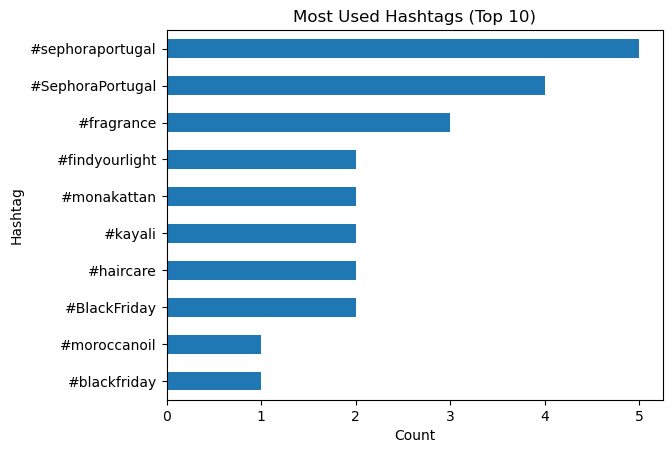

In [ ]:
# Prepare dataframe for plotting
df_used = pd.DataFrame(most_used, columns=["hashtag", "count"]).head(10)

plt.figure(figsize=(6,4))
df_used.sort_values("count").plot(
    x="hashtag",
    y="count",
    kind="barh",
    legend=False
)
plt.title("Most Used Hashtags (Top 10)")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.show()

**Most effective hashtags (Top 10, by engagement rate)**

In [48]:
# Expand hashtags into one row per hashtag
df_expanded = df_clean.explode("hashtags")

# Remove empty hashtag entries
df_expanded = df_expanded[df_expanded["hashtags"].notna()]

# Compute mean engagement rate per hashtag
effective_hashtags = (
    df_expanded.groupby("hashtags")["engagement_rate"]
    .mean()
    .sort_values(ascending=False)
)

# Show top 10
effective_hashtags.head(10)



hashtags
#BlackFriday                     0.001872
#SephoraPortugal                 0.001328
#blackfriday                     0.000824
#dualipa                         0.000778
#yslbeauty                       0.000778
#holiday                         0.000743
#webelongtosomethingbeautiful    0.000743
#fentyhair                       0.000580
#themista                        0.000580
#haircare                        0.000473
Name: engagement_rate, dtype: float64

**Visualization - Most Effective Hashtags**

<Figure size 600x400 with 0 Axes>

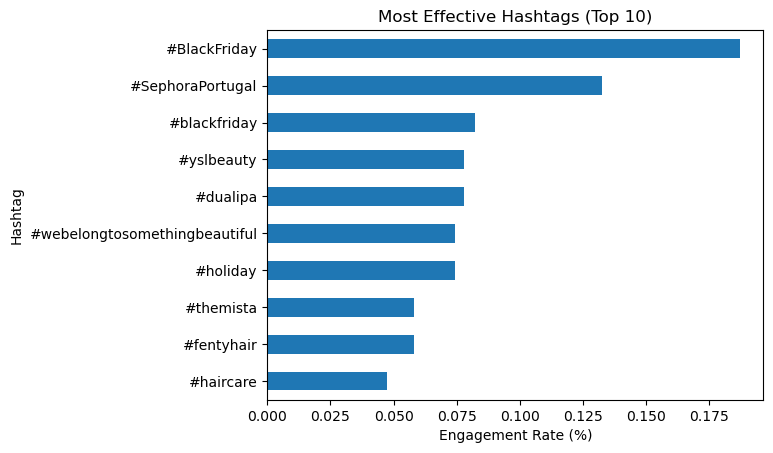

In [66]:
# Prepare dataframe for plotting
df_effective_plot = effective_hashtags.head(10).reset_index()

# Convert engagement rate to %
df_effective_plot["engagement_rate_pct"] = df_effective_plot["engagement_rate"] * 100

plt.figure(figsize=(6,4))
df_effective_plot.sort_values("engagement_rate_pct").plot(
    x="hashtags",
    y="engagement_rate_pct",
    kind="barh",
    legend=False
)

plt.title("Most Effective Hashtags (Top 10)")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Hashtag")
plt.show()


**Conclusion:** The brand consistently relies on a small set of hashtags (mainly brand and campaign tags), which naturally become the most frequently used. When looking at engagement rate, performance differences across hashtags are relatively small, but campaign-related tags (e.g., variations of "Black Friday") show slightly stronger results compared to broad, generic category tags. These patterns suggest that context-specific hashtags may contribute more effectively to post performance than generic ones.


### 5.3 Which content type performs best?


*Analyzes how different content formats compare in terms of engagement performance.*

**Average performance by content type**

In [41]:
# Compute mean metrics
content_type_performance = (
    df_clean
    .groupby("content_type")[["like_count","comment_count","total_engagement","engagement_rate"]]
    .mean()
)

# Format: likes etc = 0 casas | engagement rate = 4 casas
content_type_performance["like_count"] = content_type_performance["like_count"].round(0)
content_type_performance["comment_count"] = content_type_performance["comment_count"].round(2)
content_type_performance["total_engagement"] = content_type_performance["total_engagement"].round(0)
content_type_performance["engagement_rate"] = content_type_performance["engagement_rate"].round(4)

# Order by engagement rate
content_type_performance = content_type_performance.sort_values("engagement_rate", ascending=False)

content_type_performance


,like_count,comment_count,total_engagement,engagement_rate
content_type,,,,
carousel,512.0,3.67,515.0,0.0015
reel,182.0,3.14,185.0,0.0005


**Visualization – Engagement Rate (%) by Content Type**

<Figure size 600x400 with 0 Axes>

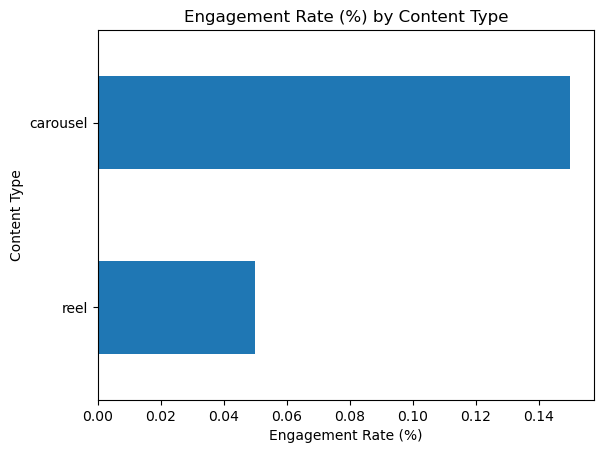

In [44]:
# Prepare dataframe for plotting
df_plot = content_type_performance.reset_index()

# Convert to %
df_plot["engagement_rate_pct"] = df_plot["engagement_rate"] * 100

plt.figure(figsize=(6,4))
df_plot.sort_values("engagement_rate_pct").plot(
    x="content_type",
    y="engagement_rate_pct",
    kind="barh",
    legend=False
)

plt.title("Engagement Rate (%) by Content Type")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Content Type")

plt.show()


**Conclusion:**  
Carousels clearly outperform reels in this dataset, delivering roughly three times more interactions on average. This advantage holds across both likes and total engagement, suggesting that multi-image formats are currently more effective than short-form video for this account.


### 5.4 Which weekdays generate the highest engagement?

*Analyzes how engagement varies across posting days to identify the most effective weekdays.*

**Average performance by weekday**

In [ ]:
# Compute mean engagement metrics by weekday
performance_by_weekday = (
    df_clean
    .groupby("weekday")[["like_count",
                         "comment_count",
                         "total_engagement",
                         "engagement_rate"]]
    .mean()
    .sort_values(by="engagement_rate", ascending=False)
)


# Format values (likes in integers, ER to 4 decimals)
performance_by_weekday["like_count"] = performance_by_weekday["like_count"].round(0)
performance_by_weekday["comment_count"] = performance_by_weekday["comment_count"].round(2)
performance_by_weekday["total_engagement"] = performance_by_weekday["total_engagement"].round(0)
performance_by_weekday["engagement_rate"] = performance_by_weekday["engagement_rate"].round(4)

# Sort by engagement rate
performance_by_weekday = performance_by_weekday.sort_values("engagement_rate", ascending=False)

performance_by_weekday


,like_count,comment_count,total_engagement,engagement_rate
weekday,,,,
Thursday,585.0,4.5,590.0,0.0017
Friday,268.0,5.0,272.0,0.0008
Wednesday,260.0,2.0,262.0,0.0008
Saturday,234.0,3.0,237.0,0.0007
Tuesday,142.0,2.0,144.0,0.0004
Monday,65.0,3.0,68.0,0.0002


**Visualization – Engagement Rate (%) by Weekday**

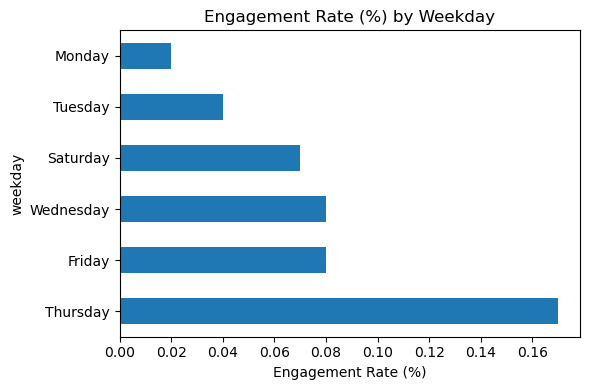

In [ ]:
# Prepare dataframe for plotting
performance_by_weekday_plot = performance_by_weekday.copy()
performance_by_weekday_plot["engagement_rate_pct"] = performance_by_weekday_plot["engagement_rate"] * 100

performance_by_weekday_plot["engagement_rate_pct"].plot(
    kind="barh",
    figsize=(6,4),
    xlabel="Engagement Rate (%)",
    title="Engagement Rate (%) by Weekday",
    legend=False
)

plt.tight_layout()
plt.show()


**Conclusion:** Within this dataset, Thursday shows the highest engagement rate, standing above the other weekdays. Friday and Wednesday follow at a moderate level, while Monday records the lowest performance. Although the sample is small, the pattern suggests that posts published later in the workweek may perform better for this account.

### 5.5 Which posting hours perform best?

**Analyzes how engagement varies across posting times.**

In [49]:
# Compute mean engagement metrics by posting hour
performance_by_hour = (
    df_clean
    .groupby("hour")[["like_count",
                      "comment_count",
                      "total_engagement",
                      "engagement_rate"]]
    .mean()
    .sort_values(by="engagement_rate", ascending=False)
)

# Format values: whole numbers for counts, 4 decimals for engagement rate
performance_by_hour["like_count"] = performance_by_hour["like_count"].round(0)
performance_by_hour["comment_count"] = performance_by_hour["comment_count"].round(2)
performance_by_hour["total_engagement"] = performance_by_hour["total_engagement"].round(0)
performance_by_hour["engagement_rate"] = performance_by_hour["engagement_rate"].round(4)

# Order by engagement rate
performance_by_hour = performance_by_hour.sort_values("engagement_rate", ascending=False)

performance_by_hour


,like_count,comment_count,total_engagement,engagement_rate
hour,,,,
15,1046.0,7.00,1053.0,0.0031
9,214.0,2.20,216.0,0.0006
17,202.0,4.67,207.0,0.0006
16,86.0,1.00,87.0,0.0003


**Visualization – Engagement Rate (%) by Posting Hour**

<Figure size 600x400 with 0 Axes>

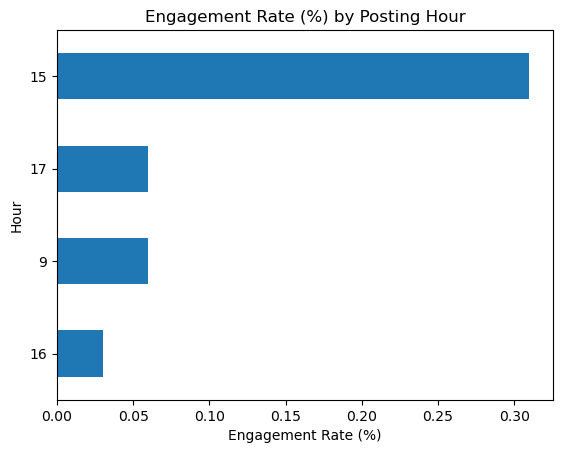

In [64]:
# Prepare dataframe for plotting
df_hour_plot = performance_by_hour.reset_index()

# Convert engagement rate to %
df_hour_plot["engagement_rate_pct"] = df_hour_plot["engagement_rate"] * 100

plt.figure(figsize=(6,4))
df_hour_plot.sort_values("engagement_rate_pct").plot(
    x="hour",
    y="engagement_rate_pct",
    kind="barh",
    legend=False
)

plt.title("Engagement Rate (%) by Posting Hour")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Hour")
plt.show()


**Conclusion:** In this dataset, posts published around 15:00 show a noticeably higher engagement rate than other posting times. Engagement at 09:00 and 17:00 is moderate and similar, while 16:00 appears weaker. These results indicate that early-to-mid afternoon may be a more favourable posting window for this account, based on the available posts.

## 5.6 Is there a combined pattern between weekday and posting hour?

*Looks at engagement by weekday–hour slot to see if any specific posting windows stand out.*

**Visualization – Engagement Rate (%) by Weekday and Hour**

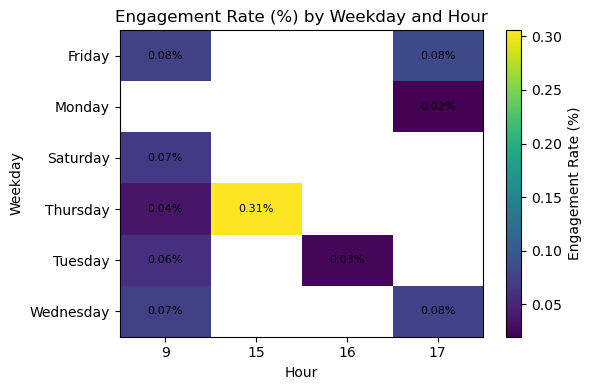

In [62]:
# Heatmap of engagement rate by weekday and hour (with percentages)

df_wh = (
    df_clean
    .groupby(["weekday", "hour"])["engagement_rate"]
    .mean()
    .reset_index()
)

# Convert to % for readability
heatmap_data = df_wh.pivot(index="weekday", columns="hour", values="engagement_rate") * 100

plt.figure(figsize=(6,4))
img = plt.imshow(heatmap_data, aspect="auto")
plt.colorbar(label="Engagement Rate (%)")
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.title("Engagement Rate (%) by Weekday and Hour")
plt.xlabel("Hour")
plt.ylabel("Weekday")

# Add percentage labels inside each cell
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        val = heatmap_data.iloc[i, j]
        if not np.isnan(val):
            plt.text(j, i, f"{val:.2f}%", ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.show()



**Conclusion:** Peak engagement is on Thursday at 15:00. Other late-week daytime slots (especially Friday morning and late afternoon) perform fairly well, while early-week or late-day posts lag. Overall, late-week daytime posting looks most promising for this account in the period analyzed.

## 6. Final Insights & Recommendations

*Brings together the EDA results to highlight the clearest performance drivers and practical next steps.*

**Key findings**

- **Content format is the strongest driver.**
Carousels outperform reels across every metric: ~3× higher average likes and total engagement, and a higher engagement rate (≈0.15% vs ≈0.05%). Multi-image storytelling is currently the account’s most efficient format.

- **Hashtag use is consistent but narrow.**
The brand relies mostly on a small core: brand tags (#SephoraPortugal / #sephoraportugal) and campaign tags (#BlackFriday / #blackfriday). Frequency is concentrated there.
Effectiveness differences are modest, but campaign-specific tags (Black Friday variants) sit at the top of engagement-rate rankings, slightly ahead of broader category tags like #fragrance / #haircare.
Context-specific hashtags seem more useful than generic ones.

- **Best timing signals point to end-of-week + mid-afternoon.**
In this sample, Thursday posts show the highest average engagement rate, clearly above other weekdays.
By hour, 15:00 stands out as the strongest posting time, with 9:00 and 17:00 forming a second tier.
The weekday-hour cross supports the same picture: the Thursday 15:00 slot is the single strongest cell.

- **Extreme spikes exist but were separated for comparability.**
The giveaway and the Ariana Grande collaboration generated unusually high engagement relative to the rest. They were removed to avoid skewing averages, but they’re still useful as signals: high-stakes activations (giveaways / celebrity drops) reliably create engagement surges, even if they aren’t representative of everyday performance.

**Recommendations (low-lift / high-impact)**

**1. Prioritise carousels for key campaigns.**
Treat reels as support content unless the creative is built around a strong hook. Carousels are currently the format that converts attention into interaction.

**2. Keep brand tags, but expand campaign/tag strategy.**
Maintain #SephoraPortugal for identity, but add more contextual + product-specific tags per post (e.g., fragrance launches, haircare drops, seasonal moments).
Avoid over-relying on broad category tags alone.

**3. Test the Thursday + 15:00 window intentionally.**
Don’t treat it as a law—treat it as a hypothesis worth testing.
Run a small controlled trial over 4–6 posts: same format + similar theme, posted on Thursday 15:00 vs another weekday/hour.

**4. Use occasional “spike” activations strategically.**
Giveaways and celebrity/product partnerships clearly drive bursts. Plan them as punctual accelerators during priority periods, not as the baseline for everyday performance.

**What to do next**


- Repeat the same analysis over a longer period (e.g., 3–6 months) to verify whether these patterns persist beyond the Black Friday window.


- Tag each post by creative/theme (campaign promo, product focus, tutorial, influencer/celebrity, etc.) to separate the impact of format from the impact of content.

